In [1]:
print("Hello World")

Hello World


In [1]:
import os
notebook_path = os.path.abspath("IR_Project")

In [2]:
import pandas as pd

In [3]:
import json

with open(os.path.join(os.path.dirname(notebook_path)),"/software/objects_corpus1.json") as json_file:
    data = json.load(json_file)

# print(data)

article_texts = []
list_of_images = []

for k, v in data.items():
  article_texts.append(v)
  list_of_images.append(k)


print(article_texts)



['', 'suitcase bicycle suitcase ', '', 'umbrella ', 'vase pottedplant ', 'banana ', 'umbrella umbrella ', 'umbrella ', 'pottedplant ', 'pottedplant ', 'horse ', 'horse ', 'bear ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse person ', 'horse ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird bird ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'heart cake ', 'heart cake ', 'heart ', 'heart cake ', 'heart umbrella ', 'heart cat ', 'heart cake vase ', 'heart diningtable ', 'heart cake ', 'heart handbag ', 'heart bird ', 'heart ', 'moon diningtable ', 'moon ', 'moon ', 'moon apple cake ', 'moon apple ', 'moon diningtable apple ', 'moon vase apple ', 'moon clock boat boat boat ', 'moon ', 'moon apple ', 'boat boat boat boat boat person pe

## Text preprocessing in the corpus


#### Preprocessing steps are as follows,



1.   Convert to lowercase characters
2.   Remove special characters
1.   Remove numbers
2.   Remove punctuations and spaces
1.   Remove stopwords
2.   Perform stemming operation

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

In [6]:
def get_vocabulary_size():
  uniqueWords = set()
  for article in article_texts:
    for word in article.split():
      uniqueWords.add(word)
  return len(uniqueWords)

In [7]:
print("Vocabulary Size before preprocessing : " +  str(get_vocabulary_size()))

Vocabulary Size before preprocessing : 31


In [8]:
# converts to lowercase
def lower_case(text):
    return text.lower()

for i in range(len(article_texts)):
  article_texts[i] = lower_case(article_texts[i])

print("Vocabulary Size after converting text to lowercase : " +  str(get_vocabulary_size()))

Vocabulary Size after converting text to lowercase : 31


In [9]:
# removes non alphanumeric chars
def remove_non_alphanumeric(text):
    res = ""
    for elem in text:
      if elem.isalnum() or elem == " ":
        res += elem
    return res

for i in range(len(article_texts)):
  article_texts[i] = remove_non_alphanumeric(article_texts[i])

print("Vocabulary Size after removing non alphanumeric chars : " +  str(get_vocabulary_size()))

Vocabulary Size after removing non alphanumeric chars : 31


In [10]:
# removes numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

for i in range(len(article_texts)):
  article_texts[i] = remove_numbers(article_texts[i])

print("Vocabulary Size after removing numbers : " +  str(get_vocabulary_size()))

Vocabulary Size after removing numbers : 31


In [11]:
# remove punctuation
def remove_punctuation_marks(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

for i in range(len(article_texts)):
  article_texts[i] = remove_punctuation_marks(article_texts[i])

print("Vocabulary Size after removing punctutaion : " +  str(get_vocabulary_size()))

Vocabulary Size after removing punctutaion : 31


In [12]:
# removes extra white space
def remove_white_space(text):
    return  " ".join(text.split())

for i in range(len(article_texts)):
  article_texts[i] = remove_white_space(article_texts[i])

print("Vocabulary Size after removing extra white space : " +  str(get_vocabulary_size()))

Vocabulary Size after removing extra white space : 31


In [13]:
# remove stopwords 
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

for i in range(len(article_texts)):
  article_texts[i] = remove_stopwords(article_texts[i])

vocab = set()
for x in article_texts:
  for word in x:
    vocab.add(word) 

print("Vocabulary Size after removing stop words : " +  str(len(vocab)))

Vocabulary Size after removing stop words : 31


# Generating Term Weights as per standard TF-IDF

In [14]:
def df_calculator(text,N) :
  DF = {}
  for i in range(N):
      tokens = text[i]
      for w in tokens:
          try:
              DF[w].add(i)
          except:
              DF[w] = {i}
  for i in DF:
      DF[i] = len(DF[i])
  return DF

In [15]:
DF_docs = df_calculator(article_texts,len(article_texts))

In [16]:
len(DF_docs)

31

In [17]:
DF_docs

{'suitcase': 1,
 'bicycle': 1,
 'umbrella': 7,
 'vase': 3,
 'pottedplant': 3,
 'banana': 1,
 'horse': 20,
 'bear': 1,
 'person': 27,
 'bird': 18,
 'aeroplane': 10,
 'heart': 12,
 'cake': 6,
 'cat': 1,
 'diningtable': 4,
 'handbag': 1,
 'moon': 10,
 'apple': 5,
 'clock': 1,
 'boat': 21,
 'chair': 2,
 'backpack': 1,
 'dog': 1,
 'tree': 10,
 'bench': 2,
 'car': 1,
 'sun': 20,
 'kite': 1,
 'elephant': 1,
 'knife': 2,
 'scissors': 1}

In [18]:
def doc_freq(word):
    c = 0
    try:
        c = DF_docs[word]
    except:
        pass
    return c

In [19]:
from collections import Counter
import numpy as np
def weights_calculator(files,text,N) :

  doc = 0

  tf_idf = {}

  for i in range(N):
      
      tokens = text[i]
      counter = Counter(tokens)
       
      for token in np.unique(tokens):
          
          tf = counter[token]
          df = doc_freq(token)
          if df==0:
            df = 1
          idf = np.log2((len(files))/(df))
          
          tf_idf[doc, token] = tf*idf

      doc += 1

  return tf_idf

In [20]:
tf_idf_docs = weights_calculator(article_texts,article_texts,len(article_texts))

In [21]:
tf_idf_docs

{(1, 'bicycle'): 7.03342300153745,
 (1, 'suitcase'): 14.0668460030749,
 (3, 'umbrella'): 4.226068079479846,
 (4, 'pottedplant'): 5.448460500816294,
 (4, 'vase'): 5.448460500816294,
 (5, 'banana'): 7.03342300153745,
 (6, 'umbrella'): 8.452136158959693,
 (7, 'umbrella'): 4.226068079479846,
 (8, 'pottedplant'): 5.448460500816294,
 (9, 'pottedplant'): 5.448460500816294,
 (10, 'horse'): 2.711494906650088,
 (11, 'horse'): 2.711494906650088,
 (12, 'bear'): 7.03342300153745,
 (13, 'horse'): 2.711494906650088,
 (14, 'horse'): 2.711494906650088,
 (15, 'horse'): 2.711494906650088,
 (16, 'horse'): 2.711494906650088,
 (17, 'horse'): 2.711494906650088,
 (18, 'horse'): 2.711494906650088,
 (19, 'horse'): 2.711494906650088,
 (20, 'horse'): 2.711494906650088,
 (21, 'horse'): 2.711494906650088,
 (22, 'horse'): 2.711494906650088,
 (23, 'horse'): 2.711494906650088,
 (24, 'horse'): 2.711494906650088,
 (25, 'horse'): 2.711494906650088,
 (26, 'horse'): 2.711494906650088,
 (27, 'horse'): 2.711494906650088,
 (2

# Vector Space Model

In [22]:
def get_vectors(text,weights) :
  vector_model = {}
  for i in range(len(text)) :
    vector = []
    for term in vocab : 
      if term in text[i] :
        vector.append(weights[(i,term)])
      else :
        vector.append(0)
    vector_model[i] = vector
  return vector_model  

In [23]:
standard_tf_idf_vsm = get_vectors(article_texts,tf_idf_docs)

In [24]:
standard_tf_idf_vsm

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 1: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  14.0668460030749,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7.03342300153745,
  0,
  0,
  0,
  0],
 2: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 3: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.226068079479846,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 4: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5.448460500816294,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5.448460500816294,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 5: [0,
  0,
  0,
  7.03342300153745,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [25]:
std_vsm_df = pd.DataFrame.from_dict(standard_tf_idf_vsm, orient ='index') 
std_vsm_df

0    1         2    3    4    5         6         7          8   \
0    0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  14.066846   
2    0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  4.226068   0.000000   
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   
..   ...  ...       ...  ...  ...  ...       ...       ...        ...   
126  0.0  0.0  6.033423  0.0  0.0  0.0  0.000000  0.000000   0.000000   
127  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   
128  0.0  0.0  6.033423  0.0  0.0  0.0  7.033423  0.000000   0.000000   
129  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   
130  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   0.000000   

           9   ...   21   22   23   24   25        26   27   28   29   30  
0    0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
1    0.000000  ...  0.0  0.0  0.0  0.0  0.0  7.033423  0.0  0.0  0.0  0.0  
2    0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
3    0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
4    5.448461  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
..        ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  
126  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
127  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
128  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
129  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  
130  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  

[131 rows x 31 columns]

## Generating ranked list for given queries 

Queries

In [26]:
q1 = "boat"
# q2 = "sun"

In [27]:
q1 = lower_case(q1)
q1 = remove_non_alphanumeric(q1)
q1 = remove_numbers(q1)
q1 = remove_punctuation_marks(q1)
q1 = remove_white_space(q1)
q1 = remove_stopwords(q1)
q1

['boat']

Similarity Measure 

In [28]:
import operator
import math

def cosine_similarity(vector_q,vector_d) :
  num = 0
  den1 = 0
  den2 = 0
  for i in range(len(vocab)) :
    num = num + vector_q[i] * vector_d[i]
    den1 = den1 + math.pow((vector_q[i]),2)
    den2 = den2 + math.pow((vector_d[i]),2)
  deno = math.sqrt((den1 * den2))

  ans = num/deno
  return ans

In [29]:
def similarity_ranking_list(vector_q,doc_vectors) :
  ranking_list = {}
  for i in range(len(doc_vectors)) :
    ranking_list[i] = cosine_similarity(vector_q[0],doc_vectors[i])

  sorted_ranking_list = dict(sorted(ranking_list.items(), key=operator.itemgetter(1),reverse=True))

  return sorted_ranking_list

#### Cosine Similarity based ranking list using standard TF-IDF weighting

In [30]:
tf_idf_q1 = weights_calculator(article_texts,[q1],1)
std_tf_idf_q1_vector = get_vectors([q1],tf_idf_q1)

In [31]:
len(std_tf_idf_q1_vector)

1

In [32]:
std_tf_idf_q1_vector

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2.64110557875869,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [33]:
std_ranking_list_q1 = similarity_ranking_list(std_tf_idf_q1_vector,standard_tf_idf_vsm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [34]:
import math

for k in std_ranking_list_q1.copy():
  v = std_ranking_list_q1[k]
  if math.isnan(v) == True:
    std_ranking_list_q1.pop(k)
  if v == 0.0:
    std_ranking_list_q1.pop(k)
    

std_ranking_list_q1

{86: 1.0,
 76: 0.8119447104908353,
 82: 0.7571660013442588,
 70: 0.7058002329081837,
 122: 0.5016456797167411,
 78: 0.501434554617987,
 81: 0.501434554617987,
 79: 0.42063653939338863,
 77: 0.37315656369819006,
 83: 0.3604082788669923,
 89: 0.3604082788669923,
 87: 0.3604082788669922,
 92: 0.3326823742462183,
 73: 0.2917610805860522,
 74: 0.2783304546151413,
 91: 0.2783304546151413,
 80: 0.22583573238789506,
 85: 0.22583573238789506,
 84: 0.18968022371848609,
 90: 0.18968022371848609,
 88: 0.07225589812520801}

In [35]:
text_retrieval_ranking_list = []

for k in std_ranking_list_q1.keys():
  text_retrieval_ranking_list.append(list_of_images[k])

text_retrieval_ranking_list

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/910479.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99614.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/moon/99007.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sunset_sunrise/910212.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/989694.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/977931.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/935844.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99906.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/778552.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/848713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/818829.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/972704.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/990781.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/956241.jp

In [36]:
for k in std_ranking_list_q1.keys():
  print(k, list_of_images[k])

86 /content/drive/MyDrive/IR/Flickr15K/images/sailling/910479.jpg
76 /content/drive/MyDrive/IR/Flickr15K/images/sailling/99614.jpg
82 /content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg
70 /content/drive/MyDrive/IR/Flickr15K/images/moon/99007.jpg
122 /content/drive/MyDrive/IR/Flickr15K/images/sunset_sunrise/910212.jpg
78 /content/drive/MyDrive/IR/Flickr15K/images/sailling/989694.jpg
81 /content/drive/MyDrive/IR/Flickr15K/images/sailling/977931.jpg
79 /content/drive/MyDrive/IR/Flickr15K/images/sailling/935844.jpg
77 /content/drive/MyDrive/IR/Flickr15K/images/sailling/99906.jpg
83 /content/drive/MyDrive/IR/Flickr15K/images/sailling/778552.jpg
89 /content/drive/MyDrive/IR/Flickr15K/images/sailling/848713.jpg
87 /content/drive/MyDrive/IR/Flickr15K/images/sailling/818829.jpg
92 /content/drive/MyDrive/IR/Flickr15K/images/sailling/972704.jpg
73 /content/drive/MyDrive/IR/Flickr15K/images/sailling/990781.jpg
74 /content/drive/MyDrive/IR/Flickr15K/images/sailling/956241.jpg
91 /conten

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img 

In [38]:
# from PIL import Image

# images_list = []

# for k in std_ranking_list_q1.keys():
#   # print("Image index : ", k, " Ranking score : ", std_ranking_list_q1[k])
#   # im = Image.open(list_of_images[k])
#   images_list.append(list_of_images[k])

# print(images_list)

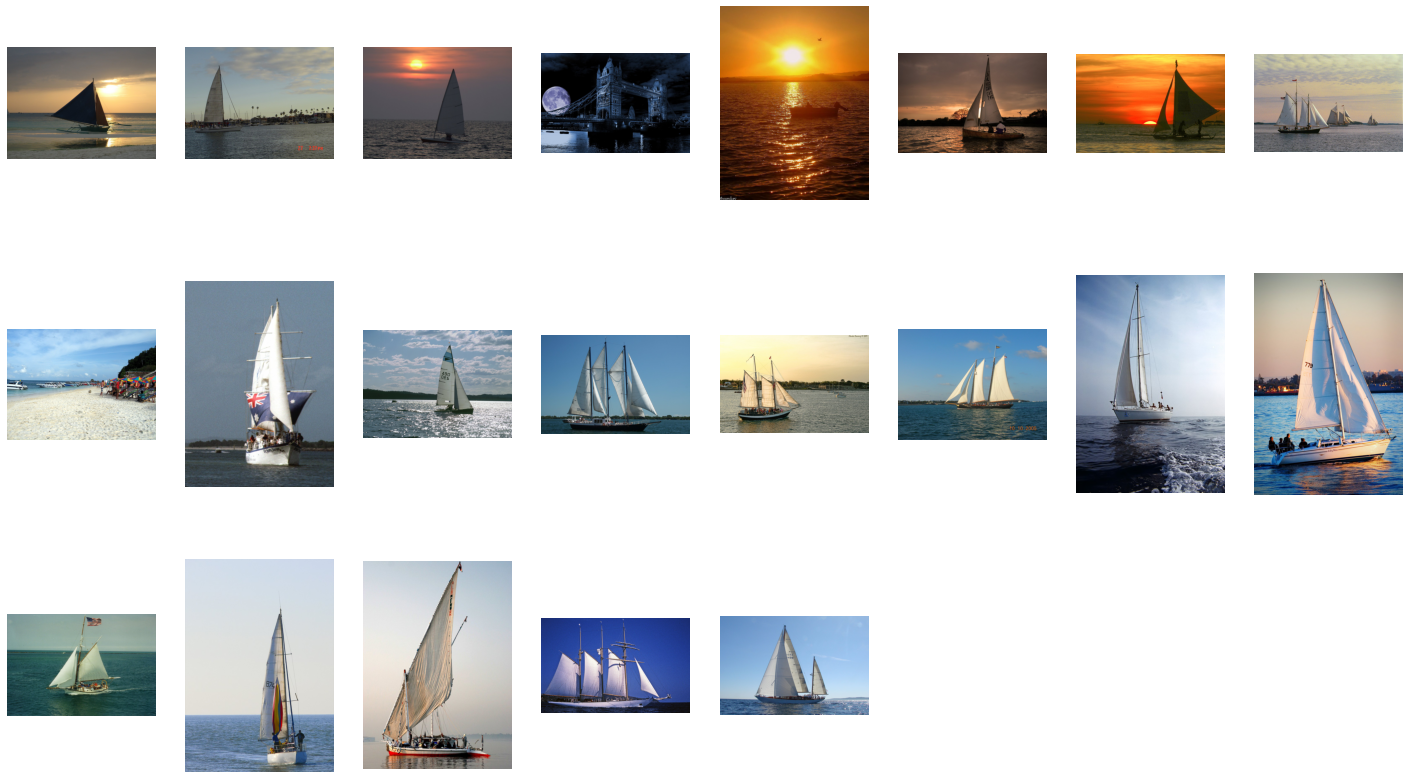

In [39]:
images_list = []

for k in std_ranking_list_q1.keys():
  # print("Image index : ", k, " Ranking score : ", std_ranking_list_q1[k])
  # im = Image.open(list_of_images[k])
  images_list.append(list_of_images[k])
  
plt.figure(figsize = (25,25));

for index, file in enumerate(images_list):
  plt.subplot(5,8,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')

In [40]:
import pickle
file=open(os.path.join(os.path.dirname(notebook_path)),'/software/Inception.pkl','rb')
ranking_inception=pickle.load(file)
file.close()


In [41]:
ranking_inception['4/7'][:100]

[['big_ben/969994', array([[0.6066441]], dtype=float32)],
 ['fire_balloon/917249', array([[0.5901197]], dtype=float32)],
 ['fire_balloon/947521', array([[0.5833498]], dtype=float32)],
 ['bird/546793', array([[0.57945824]], dtype=float32)],
 ['London_eye/382713', array([[0.56893706]], dtype=float32)],
 ['fire_balloon/917248', array([[0.56645]], dtype=float32)],
 ['Burj_Al_Arab/330598', array([[0.56469786]], dtype=float32)],
 ['sailling/62872', array([[0.5515413]], dtype=float32)],
 ['sailling/916610', array([[0.5511373]], dtype=float32)],
 ['airplane/332200', array([[0.5510876]], dtype=float32)],
 ['big_ben/990516', array([[0.5508395]], dtype=float32)],
 ['big_ben/636187', array([[0.55048215]], dtype=float32)],
 ['sailling/662752', array([[0.54906565]], dtype=float32)],
 ['heart_shape/422591', array([[0.54889464]], dtype=float32)],
 ['London_eye/713501', array([[0.544928]], dtype=float32)],
 ['big_ben/571651', array([[0.5443671]], dtype=float32)],
 ['Sydney_Opera/957979', array([[0.5440

In [42]:
ranking_inception_with_filenames = []

for item in ranking_inception['4/7'][:100]:
  image_name = item[0]
  filename = "/content/drive/MyDrive/IR/Flickr15K/images/" + image_name + ".jpg"
  ranking_inception_with_filenames.append(filename)

ranking_inception_with_filenames



['/content/drive/MyDrive/IR/Flickr15K/images/big_ben/969994.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917249.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/947521.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/bird/546793.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/London_eye/382713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917248.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Burj_Al_Arab/330598.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/62872.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/airplane/332200.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/990516.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/636187.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/662752.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/heart_shape/422591.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Lond

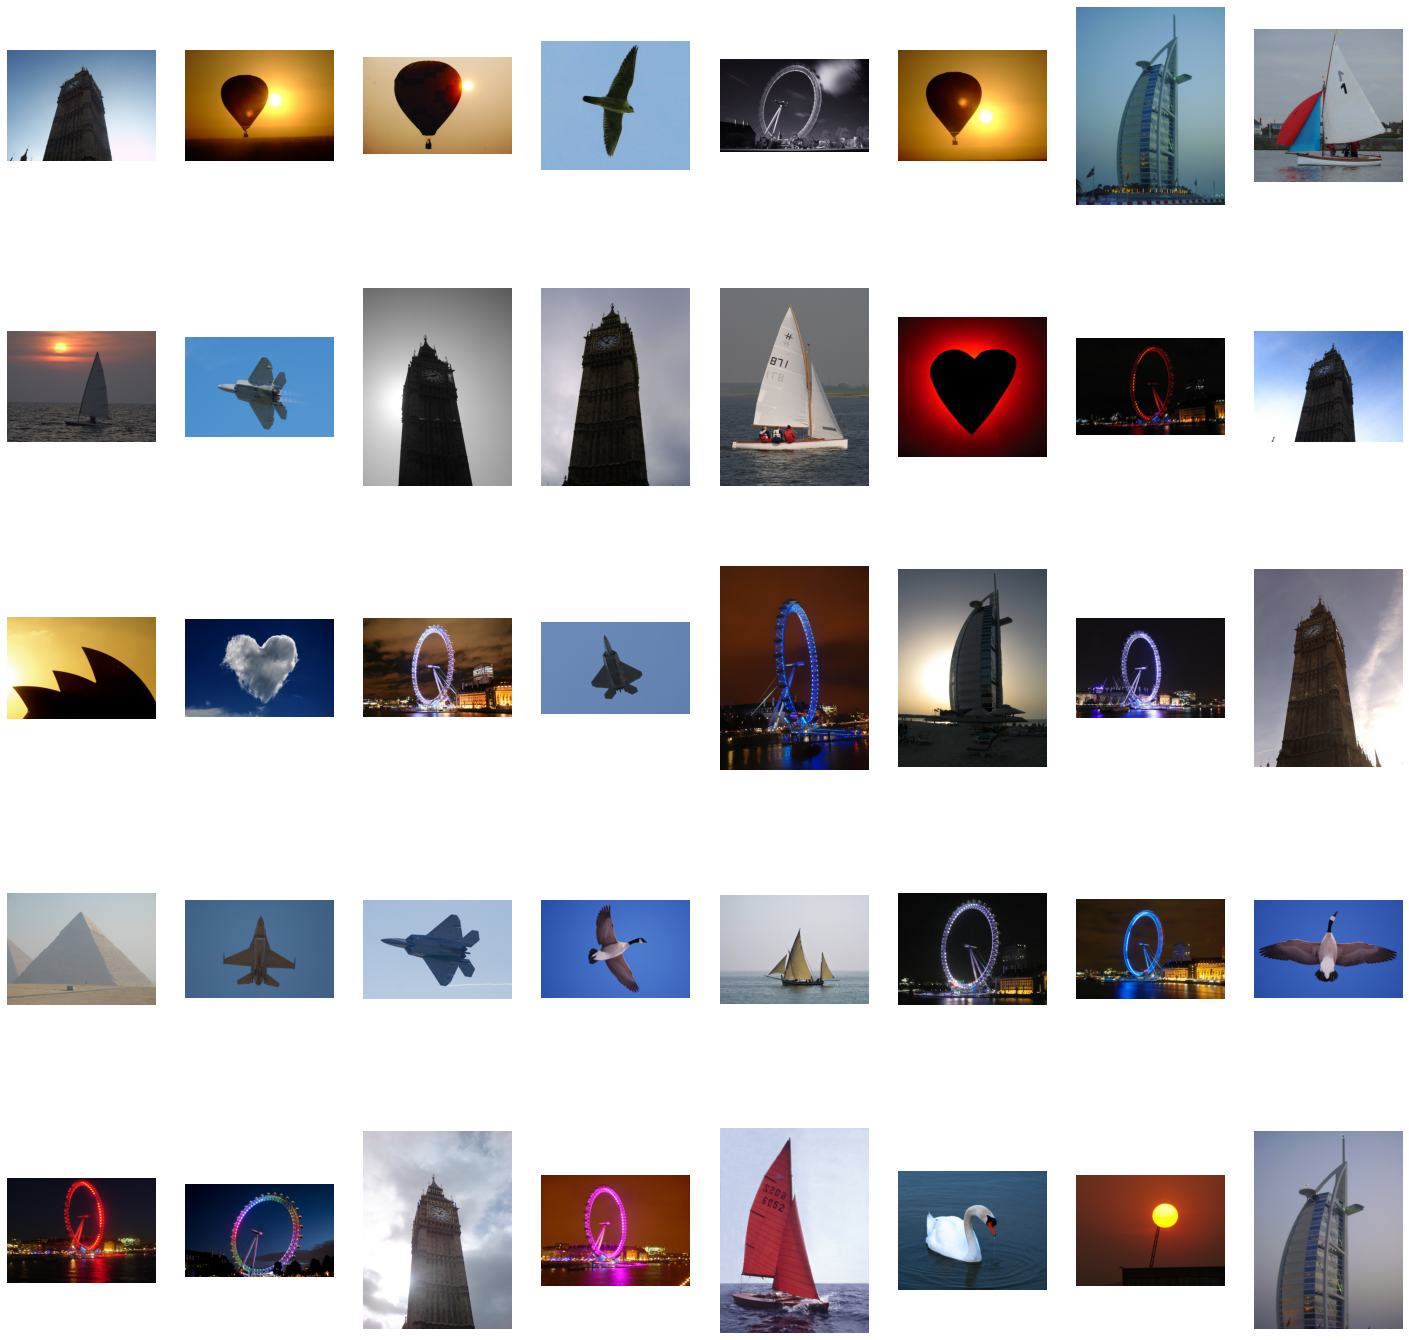

In [48]:
plt.figure(figsize = (25,25));

for index, file in enumerate(ranking_inception_with_filenames[:40]):
  plt.subplot(5,8,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')

In [43]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def subtract(li1,li2):
    temp3 = []
    for element in li1:
        if element not in li2:
            temp3.append(element)
    return temp3

def final_list(sketch_list,text_list):
    first = intersection(sketch_list,text_list)
    second = subtract(text_list,first)
    third = subtract(sketch_list,first)
    first.extend(second)
    first.extend(third)
    return first

In [44]:
merged_ranking_list_ts = final_list(ranking_inception_with_filenames, text_retrieval_ranking_list)
merged_ranking_list_ts

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/910479.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99614.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/moon/99007.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sunset_sunrise/910212.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/989694.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/977931.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/935844.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99906.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/778552.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/848713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/818829.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/972704.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/990781.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/956241.jp

ValueError: ignored

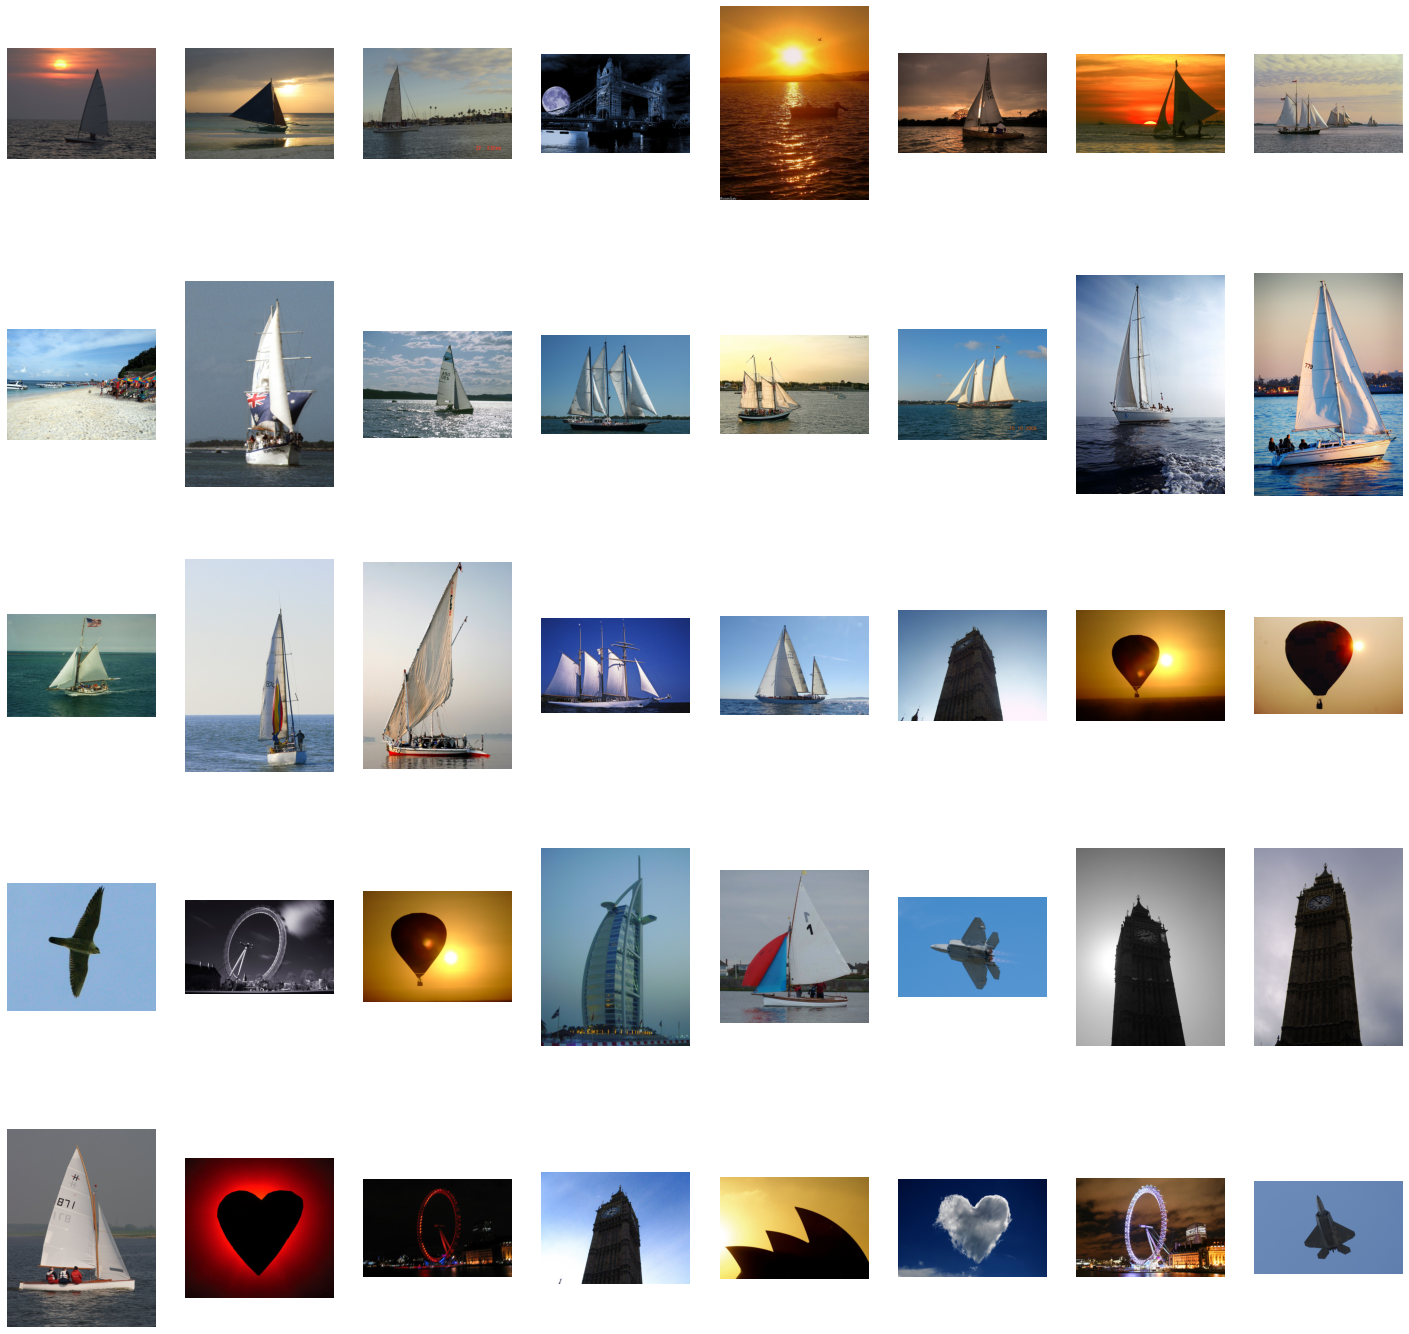

In [45]:
plt.figure(figsize = (25,25))

for index, file in enumerate(merged_ranking_list_ts[:50]):
  plt.subplot(5,8,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')

In [46]:
merged_ranking_list_st = final_list(text_retrieval_ranking_list, ranking_inception_with_filenames)
merged_ranking_list_st

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/969994.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917249.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/947521.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/bird/546793.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/London_eye/382713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917248.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Burj_Al_Arab/330598.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/62872.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/airplane/332200.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/990516.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/636187.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/662752.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/heart_shape/422591.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Lond

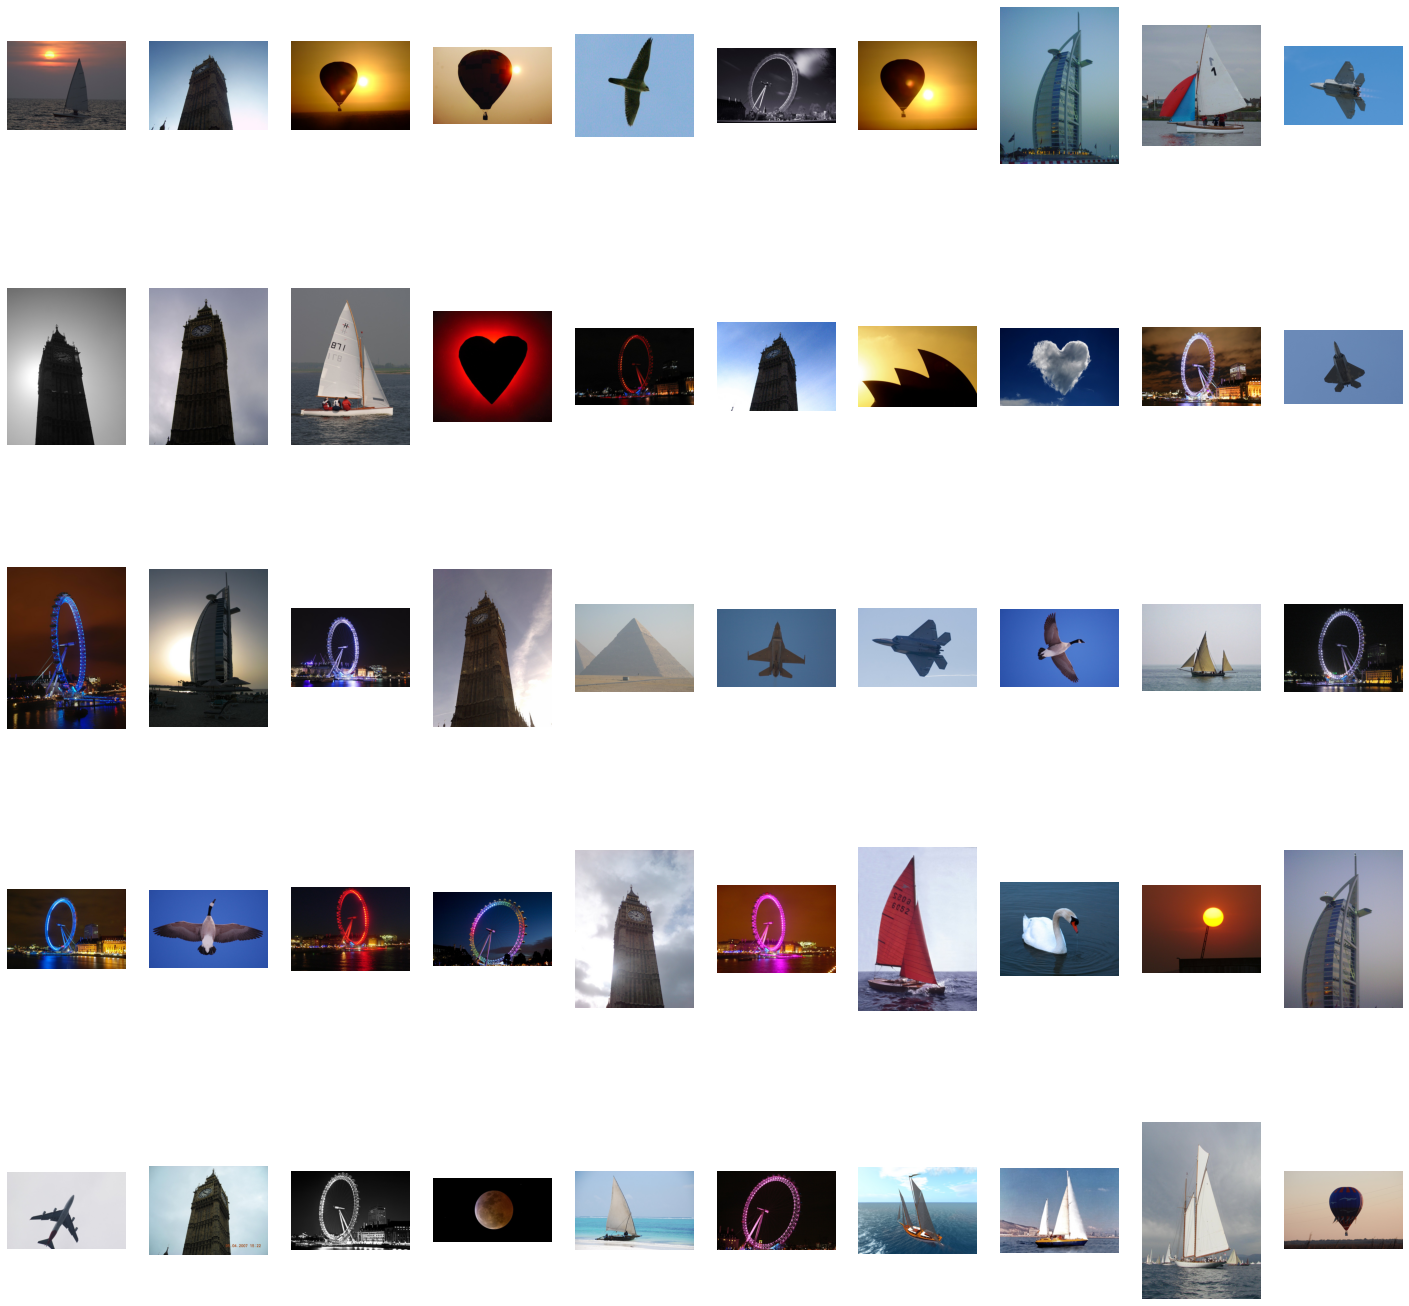

In [47]:
plt.figure(figsize = (25,25))

for index, file in enumerate(merged_ranking_list_st[:50]):
  plt.subplot(5,10,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')